In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# povcal info http://iresearch.worldbank.org/PovcalNet/Docs/dictionary.html#pop
data = pd.read_csv('data/povcal_out.csv')
data.loc[data['Country'] == 'Venezuela, Republica Bolivariana de', 'Country'] = 'Venezuela'

# south america countries
sa_countries = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Peru', 'Paraguay', 'Suriname', 'Uruguay', 'Venezuela']
data = data[data['Country'].isin(sa_countries)]

In [3]:
# int years, some fractional values, e.g. 1900.5
data['Year'] = [int(i) for i in data['Year']]

In [4]:
data.head()

,Year,DataType,Mean,Pov.line,Headcount,Pov. gap,Squared,Watts,Gini,Median,MLD,Population,Country
0,2017,i,727.65,1.9,0.44,0.20,0.15,0.12,40.63,559.21,30.0449,40.62,Argentina
1,2016,i,707.36,1.9,0.58,0.27,0.18,0.24,42.40,532.07,32.6677,40.18,Argentina
2,2014,i,648.49,1.9,0.74,0.33,0.22,0.26,41.40,489.73,31.2491,39.28,Argentina
3,2013,i,705.86,1.9,0.75,0.32,0.22,0.25,40.96,546.43,31.0329,38.82,Argentina
4,2012,i,704.11,1.9,0.80,0.32,0.22,0.34,41.24,538.74,31.3420,38.36,Argentina


# Population in extreme poverty in Brazil

In [5]:
data_brazil = data[data['Country'] == 'Brazil']

In [6]:
# on reverse way to cresc order.
years_br = data_brazil['Year'].values[::-1]
headcount_br = data_brazil['Headcount'].values[::-1]

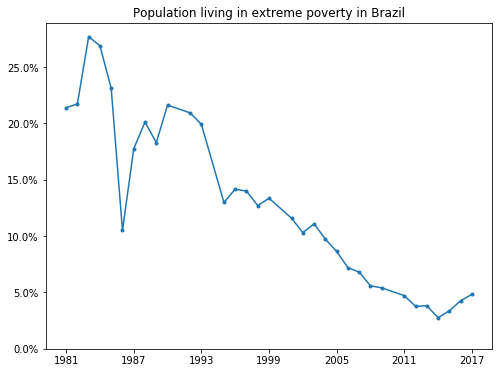

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(years_br, headcount_br, marker='.')
plt.title('Population living in extreme poverty in Brazil')
plt.xticks(np.arange(years_br[0], years_br[-1] + 1, step=6))

perc = np.linspace(0.0, 25.0, 6)
perc_str = ['{}%'.format(str(i))  for i in perc]

plt.yticks(perc, perc_str)
plt.show()

# South America countries poverty

In [8]:
headcount_dict = dict()
for i in sa_countries:
    headcount_dict[i] = data[data['Country'] == i]

In [9]:
headcount_dict.keys()

dict_keys(['Guyana', 'Ecuador', 'Argentina', 'Venezuela', 'Peru', 'Chile', 'Bolivia', 'Paraguay', 'Suriname', 'Colombia', 'Brazil', 'Uruguay'])

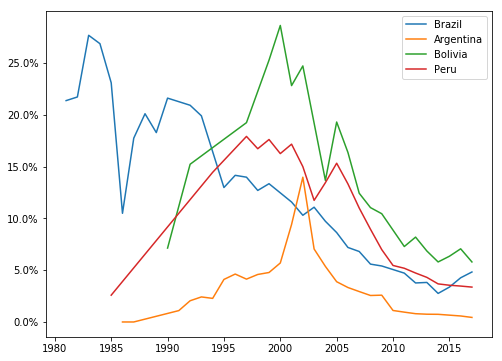

In [10]:
selected_countries = ['Brazil', 'Argentina', 'Bolivia', 'Peru']

plt.figure(figsize=(8, 6))

for c in selected_countries:
        df = headcount_dict[c].sort_values(by=['Year'])
        plt.plot( 'Year', 'Headcount', data=df)

plt.legend(selected_countries)
perc = np.linspace(0.0, 25.0, 6)
perc_str = ['{}%'.format(str(i))  for i in perc]
plt.yticks(perc, perc_str)
plt.show()

# Geopandas

In [11]:
import geopandas as gpd

In [12]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world['continent'] == 'South America')]
world = world[world['name'].isin(sa_countries)]
world.assign(headcount=np.nan)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,headcount
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,NaN
21,9775246.0,South America,Bolivia,BOL,43270.0,POLYGON ((-62.84646847192156 -22.0349854468694...,NaN
22,198739269.0,South America,Brazil,BRA,1993000.0,POLYGON ((-57.62513342958296 -30.2162948544542...,NaN
29,16601707.0,South America,Chile,CHL,244500.0,(POLYGON ((-68.63401022758316 -52.636370458874...,NaN
35,45644023.0,South America,Colombia,COL,395400.0,POLYGON ((-75.37322323271385 -0.15203175212045...,NaN
46,14573101.0,South America,Ecuador,ECU,107700.0,POLYGON ((-80.30256059438722 -3.40485645916471...,NaN
67,772298.0,South America,Guyana,GUY,2966.0,POLYGON ((-59.75828487815919 8.367034816924047...,NaN
124,29546963.0,South America,Peru,PER,247300.0,POLYGON ((-69.59042375352405 -17.5800118954193...,NaN
131,6995655.0,South America,Paraguay,PRY,28890.0,POLYGON ((-62.68505713565789 -22.2490292294223...,NaN
148,481267.0,South America,Suriname,SUR,4254.0,POLYGON ((-57.14743648947689 5.973149929219161...,NaN


In [13]:
data_poverty_2015 = data[data['Year'] == 2015]
data_poverty_2015

,Year,DataType,Mean,Pov.line,Headcount,Pov. gap,Squared,Watts,Gini,Median,MLD,Population,Country
37,2015,i,417.83,1.9,6.35,2.81,1.73,4.88,46.73,294.75,42.5628,10.72,Bolivia
57,2015,i,585.52,1.9,3.37,1.17,0.61,1.47,51.32,366.52,48.5797,205.96,Brazil
89,2015,i,657.85,1.9,1.30,0.76,0.61,0.84,47.65,424.68,42.9823,17.76,Chile
104,2015,i,439.77,1.9,4.54,1.75,1.05,2.30,51.10,271.93,50.1763,48.23,Colombia
179,2015,i,418.81,1.9,3.44,1.23,0.67,1.59,45.95,286.75,38.1569,16.14,Ecuador
335,2015,i,511.40,1.9,1.89,0.41,0.14,0.50,47.61,338.66,40.1360,6.64,Paraguay
356,2015,i,393.64,1.9,3.55,0.97,0.41,1.31,43.36,290.63,33.8052,31.38,Peru
384,2015,i,809.96,1.9,0.13,0.03,0.02,0.03,40.16,620.30,27.9966,3.43,Uruguay


In [14]:
# adding headcount values to world series from data_poverty
for i in world['name']:
    query = data_poverty_2015['Headcount'].loc[data_poverty_2015['Country'] == i].values
    if (len(query) > 0):
        world.loc[world['name'] == i, 'headcount'] = query[0]

In [15]:
world = world.dropna(subset=['headcount'])
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,headcount
21,9775246.0,South America,Bolivia,BOL,43270.0,POLYGON ((-62.84646847192156 -22.0349854468694...,6.35
22,198739269.0,South America,Brazil,BRA,1993000.0,POLYGON ((-57.62513342958296 -30.2162948544542...,3.37
29,16601707.0,South America,Chile,CHL,244500.0,(POLYGON ((-68.63401022758316 -52.636370458874...,1.30
35,45644023.0,South America,Colombia,COL,395400.0,POLYGON ((-75.37322323271385 -0.15203175212045...,4.54
46,14573101.0,South America,Ecuador,ECU,107700.0,POLYGON ((-80.30256059438722 -3.40485645916471...,3.44
124,29546963.0,South America,Peru,PER,247300.0,POLYGON ((-69.59042375352405 -17.5800118954193...,3.55
131,6995655.0,South America,Paraguay,PRY,28890.0,POLYGON ((-62.68505713565789 -22.2490292294223...,1.89
167,3494382.0,South America,Uruguay,URY,43160.0,POLYGON ((-57.62513342958296 -30.2162948544542...,0.13


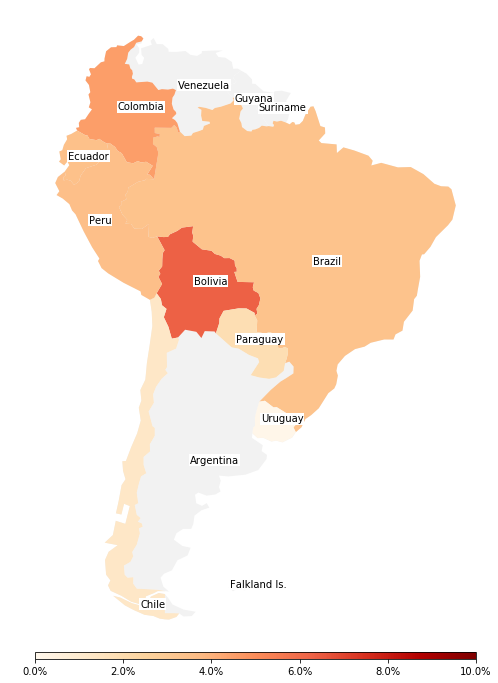

In [16]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

cmap = 'OrRd'
vmin = .0
vmax = 10.

# south america
world_ = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_ = world_[world_['continent'] == 'South America']
ax_ = world_.plot(color='0.95', figsize=(16, 12))

ax = world.plot(ax=ax_, column='headcount', figsize=(16, 12), cmap=cmap, vmin=vmin, vmax=vmax)
plt.axis('off')

# making bbox for each country name
for x, y, label in zip(world_.geometry.representative_point().x - 2.0, world_.geometry.representative_point().y - 0.5, world_.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", bbox=dict(boxstyle='square,pad=0.1', fc='white', ec='none'))
    
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []

# divider to adjust cbar to size of figure
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="1%", pad=0.05)

# add the colorbar to the figure
cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')

# values to use on colorbar scale
perc = np.linspace(vmin, vmax, 6)
perc_str = ['{}%'.format(str(i))  for i in perc]
cbar.ax.set_xticklabels(perc_str)

plt.show()

# GDP, Unemployment rate and self-employment rate (Brazil)

In [17]:
gdp_data = pd.read_csv('data/oecd_gdp.csv')
gdp_data = gdp_data[gdp_data['LOCATION'] == 'BRA']
gdp_data.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
1756,BRA,GDP,TOT,USD_CAP,A,2000,9091.892265,NaN
1757,BRA,GDP,TOT,USD_CAP,A,2001,9296.974644,NaN
1758,BRA,GDP,TOT,USD_CAP,A,2002,9603.149244,NaN
1759,BRA,GDP,TOT,USD_CAP,A,2003,9785.188819,NaN
1760,BRA,GDP,TOT,USD_CAP,A,2004,10508.408121,NaN


In [27]:
unempl_data = pd.read_csv('data/oecd_unemployment.csv')
unempl_data = unempl_data[unempl_data['LOCATION'] == 'BRA']
unempl_data.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,BRA,UNEMP,TOT,PC_LF,A,1981,14.112940,NaN
1,BRA,UNEMP,TOT,PC_LF,A,1982,11.192400,NaN
2,BRA,UNEMP,TOT,PC_LF,A,1983,11.966450,NaN
3,BRA,UNEMP,TOT,PC_LF,A,1984,12.712210,NaN
4,BRA,UNEMP,TOT,PC_LF,A,1985,9.388283,NaN


In [29]:
self_empl_data = pd.read_csv('data/oecd_self-employment.csv')
self_empl_data = self_empl_data[self_empl_data['LOCATION'] == 'BRA']
self_empl_data.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,BRA,SELFEMP,TOT,PC_EMP,A,2001,37.11788,NaN
1,BRA,SELFEMP,TOT,PC_EMP,A,2002,37.19898,NaN
2,BRA,SELFEMP,TOT,PC_EMP,A,2003,37.20444,B
3,BRA,SELFEMP,TOT,PC_EMP,A,2004,36.55495,NaN
4,BRA,SELFEMP,TOT,PC_EMP,A,2005,36.58573,NaN


In [30]:
data_brazil = data[data['Country'] == 'Brazil']
data_brazil = data_brazil.assign(GDP = np.nan)
data_brazil = data_brazil.assign(Unemployment = np.nan)
data_brazil = data_brazil.assign(Self_Employment = np.nan)
data_brazil.head()

,Year,DataType,Mean,Pov.line,Headcount,Pov. gap,Squared,Watts,Gini,Median,MLD,Population,Country,GDP,Unemployment,Self_Employment
55,2017,i,602.29,1.9,4.83,1.85,1.03,2.25,53.32,362.59,54.3762,209.29,Brazil,NaN,NaN,NaN
56,2016,i,610.14,1.9,4.27,1.60,0.90,1.87,53.67,363.98,54.5662,207.65,Brazil,NaN,NaN,NaN
57,2015,i,585.52,1.9,3.37,1.17,0.61,1.47,51.32,366.52,48.5797,205.96,Brazil,NaN,NaN,NaN
58,2014,i,619.42,1.9,2.76,0.95,0.50,1.14,51.47,385.07,48.5768,204.21,Brazil,NaN,NaN,NaN
59,2013,i,612.11,1.9,3.82,1.54,0.92,1.84,52.77,372.53,52.5934,202.41,Brazil,NaN,NaN,NaN


In [31]:
# Copying GPD values from OECD dataframe to brazil dataframe
for year, value in zip(gdp_data.TIME, gdp_data.Value): 
    data_brazil.loc[data_brazil['Year'] == year, 'GDP'] = value

# Copying Unemplyment rate values from OECD dataframe to brazil dataframe
for year, value in zip(unempl_data.TIME, unempl_data.Value): 
    data_brazil.loc[data_brazil['Year'] == year, 'Unemployment'] = value

# Copying Unemplyment rate values from OECD dataframe to brazil dataframe
for year, value in zip(self_empl_data.TIME, self_empl_data.Value): 
    data_brazil.loc[data_brazil['Year'] == year, 'Self_Employment'] = value

In [62]:
data_brazil.head()

,Year,DataType,Mean,Pov.line,Headcount,Pov. gap,Squared,Watts,Gini,Median,MLD,Population,Country,GDP,Unemployment,Self_Employment
55,2017,i,602.29,1.9,4.83,1.85,1.03,2.25,53.32,362.59,54.3762,209.29,Brazil,NaN,NaN,32.30655
56,2016,i,610.14,1.9,4.27,1.60,0.90,1.87,53.67,363.98,54.5662,207.65,Brazil,15385.778312,NaN,31.74040
57,2015,i,585.52,1.9,3.37,1.17,0.61,1.47,51.32,366.52,48.5797,205.96,Brazil,15847.582563,NaN,32.94103
58,2014,i,619.42,1.9,2.76,0.95,0.50,1.14,51.47,385.07,48.5768,204.21,Brazil,16396.241834,4.851514,32.27552
59,2013,i,612.11,1.9,3.82,1.54,0.92,1.84,52.77,372.53,52.5934,202.41,Brazil,16163.011938,5.400495,31.15304


## Headcount x GDP

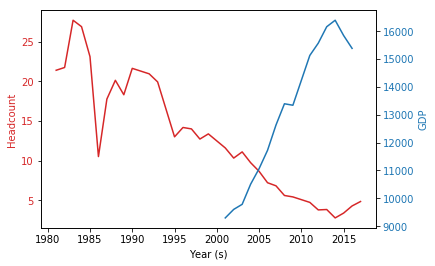

In [32]:
x = np.flip(data_brazil.Year.values, 0)
y1 = np.flip(data_brazil.Headcount.values, 0)
y2 = np.flip(data_brazil.GDP.values, 0)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year (s)')
ax1.set_ylabel('Headcount', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('GDP', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


## Headcount x Unemployment rate

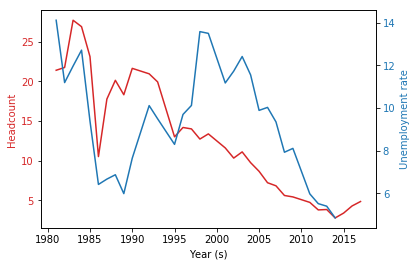

In [33]:
x = np.flip(data_brazil.Year.values, 0)
y1 = np.flip(data_brazil.Headcount.values, 0)
y2 = np.flip(data_brazil.Unemployment.values, 0)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year (s)')
ax1.set_ylabel('Headcount', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Unemployment rate', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


## Unemployment rate x Self-employment rate

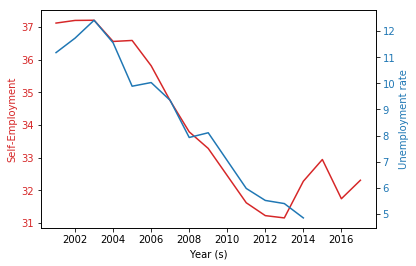

In [59]:
data_brazil_2001_to_2018 = data_brazil[data_brazil['Year'] >= 2001]

x = np.flip(data_brazil_2001_to_2018.Year.values, 0)
y1 = np.flip(data_brazil_2001_to_2018.Self_Employment.values, 0)
y2 = np.flip(data_brazil_2001_to_2018.Unemployment.values, 0)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year (s)')
ax1.set_ylabel('Self-Employment', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Unemployment rate', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
